In [17]:
import pandas as pd
import seaborn as sns

In [75]:
fertilizer_df=pd.read_csv('FAOSTAT_fertilizer.csv')
food_balances_df=pd.read_csv('FAOSTAT_food_balances.csv')

In [76]:
fertilizer_df

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,RFN,Fertilizers by Nutrient,4,Afghanistan,5610,Import quantity,3102,Nutrient nitrogen N (total),1961,1961,t,1000.00,I,Imputed value,NaN
1,RFN,Fertilizers by Nutrient,4,Afghanistan,5157,Agricultural Use,3102,Nutrient nitrogen N (total),1961,1961,t,1000.00,E,Estimated value,NaN
2,RFN,Fertilizers by Nutrient,4,Afghanistan,5159,Use per area of cropland,3102,Nutrient nitrogen N (total),1961,1961,kg/ha,0.13,E,Estimated value,NaN
3,RFN,Fertilizers by Nutrient,4,Afghanistan,5172,Use per capita,3102,Nutrient nitrogen N (total),1961,1961,kg/cap,0.11,E,Estimated value,NaN
4,RFN,Fertilizers by Nutrient,4,Afghanistan,5173,Use per value of agricultural production,3102,Nutrient nitrogen N (total),1961,1961,g/Int$,0.39,E,Estimated value,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188508,RFN,Fertilizers by Nutrient,716,Zimbabwe,5910,Export quantity,3104,Nutrient potash K2O (total),2022,2022,t,297.00,I,Imputed value,NaN
188509,RFN,Fertilizers by Nutrient,716,Zimbabwe,5157,Agricultural Use,3104,Nutrient potash K2O (total),2022,2022,t,16700.00,I,Imputed value,NaN
188510,RFN,Fertilizers by Nutrient,716,Zimbabwe,5159,Use per area of cropland,3104,Nutrient potash K2O (total),2022,2022,kg/ha,5.26,E,Estimated value,NaN
188511,RFN,Fertilizers by Nutrient,716,Zimbabwe,5172,Use per capita,3104,Nutrient potash K2O (total),2022,2022,kg/cap,1.02,E,Estimated value,NaN


In [86]:
data=food_balances_df[food_balances_df['Element']=='Total Population - Both sexes'][['Area','Year','Value']].rename({'Value':'Population'}, axis=1)
data=data.merge(food_balances_df[food_balances_df['Element']=='Food supply (kcal)'][['Area','Year','Value']], on=['Area', 'Year']).rename({'Value':'Food (kcal)'}, axis=1)
#data['Population']*=1000
#data['Food (kcal)']*=1e6
data=data.merge(fertilizer_df[fertilizer_df['Element']=='Agricultural Use'][['Area','Year','Item','Value','Unit']], on=['Area', 'Year']
                ).rename({'Value':'Consumption'}, axis=1
                ).drop_duplicates(['Area', 'Year', 'Item', 'Unit'])
data

,Area,Year,Population,Food (kcal),Item,Consumption,Unit
0,Afghanistan,2010,28189.67,22714261.33,Nutrient nitrogen N (total),12929.01,t
1,Afghanistan,2010,28189.67,22714261.33,Nutrient phosphate P2O5 (total),925.85,t
2,Afghanistan,2010,28189.67,22714261.33,Nutrient potash K2O (total),0.00,t
12,Afghanistan,2011,29249.16,23264732.28,Nutrient nitrogen N (total),22970.63,t
13,Afghanistan,2011,29249.16,23264732.28,Nutrient phosphate P2O5 (total),6845.57,t
...,...,...,...,...,...,...,...
27825,Zimbabwe,2021,15993.52,12016223.71,Nutrient phosphate P2O5 (total),47900.00,t
27826,Zimbabwe,2021,15993.52,12016223.71,Nutrient potash K2O (total),16700.00,t
27836,Zimbabwe,2022,16320.54,12155291.61,Nutrient nitrogen N (total),39300.00,t
27837,Zimbabwe,2022,16320.54,12155291.61,Nutrient phosphate P2O5 (total),47900.00,t


In [94]:
data[(data['Item']=='Nutrient nitrogen N (total)') & (data['Unit']=='t')].groupby('Year').aggregate({'Population':'sum', 'Food (kcal)':'sum','Consumption':'sum'})

,Population,Food (kcal),Consumption
Year,,,
2010,8284483.24,8.673927e+09,1.309007e+08
2011,8356507.95,8.829741e+09,1.351900e+08
2012,8511097.56,9.009878e+09,1.358997e+08
2013,8608549.28,9.126874e+09,1.378133e+08
2014,8705398.95,9.363885e+09,1.391016e+08
2015,8789994.80,9.468662e+09,1.375859e+08
2016,8898354.01,9.597205e+09,1.382556e+08
2017,8993065.44,9.780238e+09,1.396247e+08
2018,9084628.89,9.912904e+09,1.370849e+08


In [98]:
data.Area.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'China, Hong Kong SAR', 'China, mainland',
       'China, Taiwan Province of', 'Colombia', 'Comoros', 'Congo',
       'Costa Rica', "Côte d'Ivoire", 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji',
       'Finland', 'France', 'French Polynesia', 'Gab

In [103]:
a=data[data['Area'].str.contains('China')].drop_duplicates(['Area','Year'])
a['Population']=a['Population']/1e6
a

,Area,Year,Population,Food (kcal),Item,Consumption,Unit
4800,China,2010,1.378964,1.534057e+09,Nutrient nitrogen N (total),29703808.82,t
4812,China,2011,1.387985,1.566960e+09,Nutrient nitrogen N (total),30296637.10,t
4824,China,2012,1.397612,1.584936e+09,Nutrient nitrogen N (total),30799794.90,t
4836,China,2013,1.407321,1.594302e+09,Nutrient nitrogen N (total),30962774.36,t
4848,China,2014,1.416569,1.655250e+09,Nutrient nitrogen N (total),31140359.25,t
4860,China,2015,1.425243,1.682975e+09,Nutrient nitrogen N (total),30949245.45,t
4872,China,2016,1.433547,1.685847e+09,Nutrient nitrogen N (total),30543526.58,t
4884,China,2017,1.442041,1.713891e+09,Nutrient nitrogen N (total),29692008.13,t
4896,China,2018,1.448928,1.731130e+09,Nutrient nitrogen N (total),28285980.63,t
4908,China,2019,1.453802,1.751495e+09,Nutrient nitrogen N (total),26873496.35,t


In [95]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.stats.mstats import gmean

# Sample DataFrame
df=data[(data['Item']=='Nutrient phosphate P2O5 (total)') & (data['Unit']=='t')].groupby('Year').aggregate({'Population':'sum', 'Food (kcal)':'sum','Consumption':'sum'}).reset_index()
df[['Population','Food (kcal)','Consumption']]=df[['Population','Food (kcal)','Consumption']]/df[['Population','Food (kcal)','Consumption']].max()


#df[['Population', 'Food (kcal)', 'Consumption']]=df[['Population', 'Food (kcal)', 'Consumption']]/gmean(df[['Population', 'Food (kcal)', 'Consumption']], axis=1).reshape((13,1))

# Create figure
fig = go.Figure()

# Add traces for each year
for year in df['Year']:
    fig.add_trace(go.Bar(
        x=df.columns[1:],  # Categories
        y=df[df['Year'] == year].values[0][1:],  # Values for that year
        name=str(year),
        visible=(year == df['Year'].iloc[0])  # Only first year visible initially
    ))

# Create slider steps
steps = []
for i, year in enumerate(df['Year']):
    step = {
        'method': 'update',
        'args': [
            {'visible': [j == i for j in range(len(df['Year']))]},  # Show only selected year's bars
            {'title': f"Year: {year}"}
        ],
        'label': str(year)
    }
    steps.append(step)

# Add slider
fig.update_layout(
    sliders=[{
        'active': 0,
        'currentvalue': {"prefix": "Year: "},
        'pad': {"t": 50},
        'steps': steps
    }],
    title="Category Values Over Years",
    xaxis_title="Categories",
    yaxis_title="Values",
    barmode='group',
    #yaxis_type="log",
)

fig.show()


In [25]:
import nbformat

In [26]:
nbformat.__version__

'5.10.4'

In [27]:
food_balances_df[(food_balances_df['Item']=='Grand Total') & (food_balances_df['Element']=='Food supply (kcal)')]

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (FBS),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
14,FBS,Food Balances (2010-),4,Afghanistan,661,Food supply (kcal),S2901,Grand Total,2010,2010,million Kcal,22714261.33,E,Estimated value,NaN
16,FBS,Food Balances (2010-),4,Afghanistan,661,Food supply (kcal),S2901,Grand Total,2011,2011,million Kcal,23264732.28,E,Estimated value,NaN
18,FBS,Food Balances (2010-),4,Afghanistan,661,Food supply (kcal),S2901,Grand Total,2012,2012,million Kcal,24159167.28,E,Estimated value,NaN
20,FBS,Food Balances (2010-),4,Afghanistan,661,Food supply (kcal),S2901,Grand Total,2013,2013,million Kcal,25454589.34,E,Estimated value,NaN
22,FBS,Food Balances (2010-),4,Afghanistan,661,Food supply (kcal),S2901,Grand Total,2014,2014,million Kcal,27175651.90,E,Estimated value,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37821,FBS,Food Balances (2010-),716,Zimbabwe,661,Food supply (kcal),S2901,Grand Total,2018,2018,million Kcal,11362851.44,E,Estimated value,NaN
37823,FBS,Food Balances (2010-),716,Zimbabwe,661,Food supply (kcal),S2901,Grand Total,2019,2019,million Kcal,11361756.90,E,Estimated value,NaN
37825,FBS,Food Balances (2010-),716,Zimbabwe,661,Food supply (kcal),S2901,Grand Total,2020,2020,million Kcal,11535757.10,E,Estimated value,NaN
37827,FBS,Food Balances (2010-),716,Zimbabwe,661,Food supply (kcal),S2901,Grand Total,2021,2021,million Kcal,12016223.71,E,Estimated value,NaN


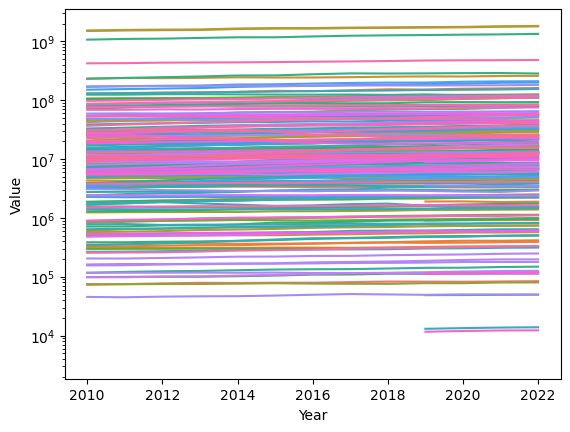

In [28]:
ax = sns.lineplot(
    food_balances_df[(food_balances_df['Item']=='Grand Total') & (food_balances_df['Element']=='Food supply (kcal)')],
    x='Year',
    y='Value',
    hue='Area',
    legend=False
)
ax.set_yscale('log')


In [29]:
food_balances_df[(food_balances_df['Item']=='Grand Total') & (food_balances_df['Element']=='Food supply (kcal)')].sort_values('Value')

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (FBS),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
24305,FBS,Food Balances (2010-),530,Netherlands Antilles (former),661,Food supply (kcal),S2901,Grand Total,2010,2010,million Kcal,3.567050e+03,E,Estimated value,NaN
35029,FBS,Food Balances (2010-),798,Tuvalu,661,Food supply (kcal),S2901,Grand Total,2019,2019,million Kcal,1.160799e+04,E,Estimated value,NaN
35031,FBS,Food Balances (2010-),798,Tuvalu,661,Food supply (kcal),S2901,Grand Total,2020,2020,million Kcal,1.196738e+04,E,Estimated value,NaN
35033,FBS,Food Balances (2010-),798,Tuvalu,661,Food supply (kcal),S2901,Grand Total,2021,2021,million Kcal,1.220026e+04,E,Estimated value,NaN
35035,FBS,Food Balances (2010-),798,Tuvalu,661,Food supply (kcal),S2901,Grand Total,2022,2022,million Kcal,1.226937e+04,E,Estimated value,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,FBS,Food Balances (2010-),159,China,661,Food supply (kcal),S2901,Grand Total,2020,2020,million Kcal,1.764723e+09,E,Estimated value,NaN
7221,FBS,Food Balances (2010-),156,"China, mainland",661,Food supply (kcal),S2901,Grand Total,2021,2021,million Kcal,1.772204e+09,E,Estimated value,NaN
7223,FBS,Food Balances (2010-),156,"China, mainland",661,Food supply (kcal),S2901,Grand Total,2022,2022,million Kcal,1.796687e+09,E,Estimated value,NaN
6604,FBS,Food Balances (2010-),159,China,661,Food supply (kcal),S2901,Grand Total,2021,2021,million Kcal,1.806664e+09,E,Estimated value,NaN
